In [1]:
#import necessary libraries
import pandas as pd
import numpy as np



In [2]:
#Dataset

data = pd.read_csv('Telco-Customer-Churn.csv')

customer_churn = data.copy()

customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_churn.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

### Descriptive Statistics

In [4]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Count unique values for each categorical variable
for column in customer_churn.select_dtypes(include='object').columns:
    print(f"\n{column} Value Counts:\n", customer_churn[column].value_counts())


customerID Value Counts:
 customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender Value Counts:
 gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner Value Counts:
 Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents Value Counts:
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService Value Counts:
 PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines Value Counts:
 MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService Value Counts:
 InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity Value Counts:
 OnlineSecurity
No                     3498
Yes                    2019
No internet servi

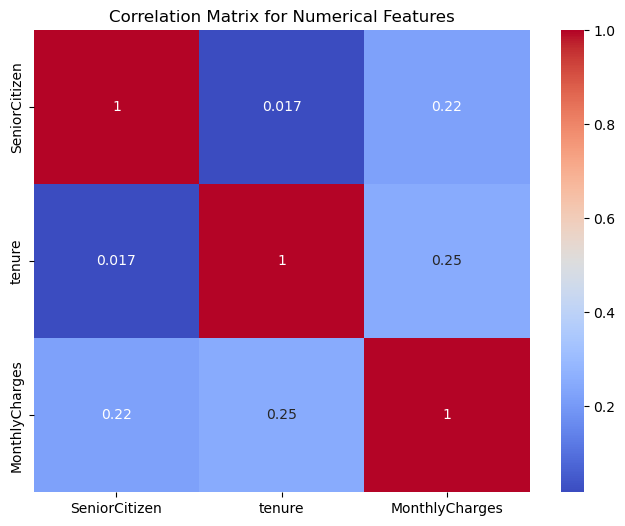

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Testing for multicollinearity between numerical data using the Correlation heatmap
num_data = customer_churn[['SeniorCitizen','tenure','MonthlyCharges']]
plt.figure(figsize=(8, 6))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Features")
plt.show()

The heatmap shows that there is no strong linear relationship between the numerical columns.
We can therefore use them in the Feature Engineering phase

#### Checking Churn Rate by Categorical Variables

Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


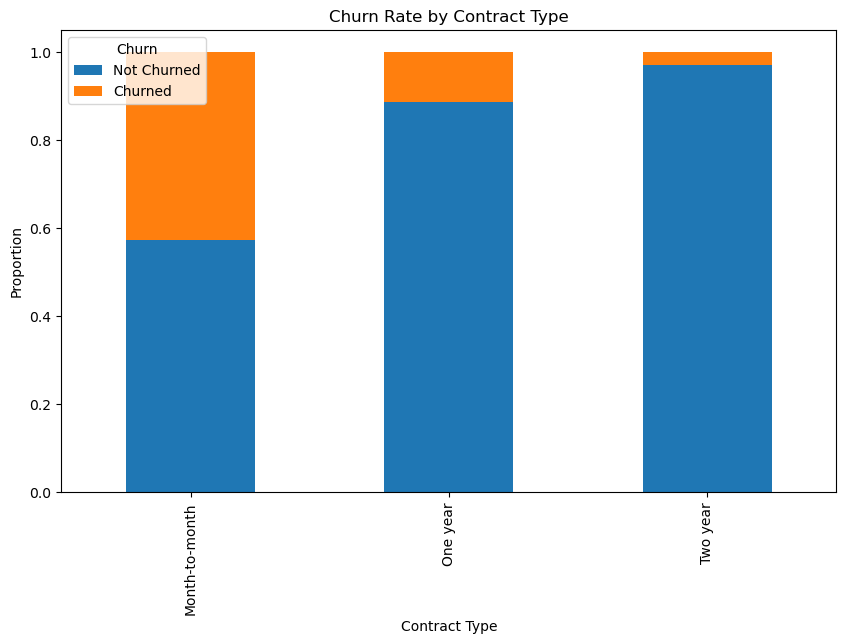

In [7]:
# Churn rate by Contract type
churn_by_contract = customer_churn.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_contract)

# Visualization
churn_by_contract.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.xlabel('Contract Type')
plt.legend(['Not Churned', 'Churned'], title='Churn')
plt.show()

This initial analysis shows that customers who are in the monthly contract type 
have a higher churn rate than those with annual contract

Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


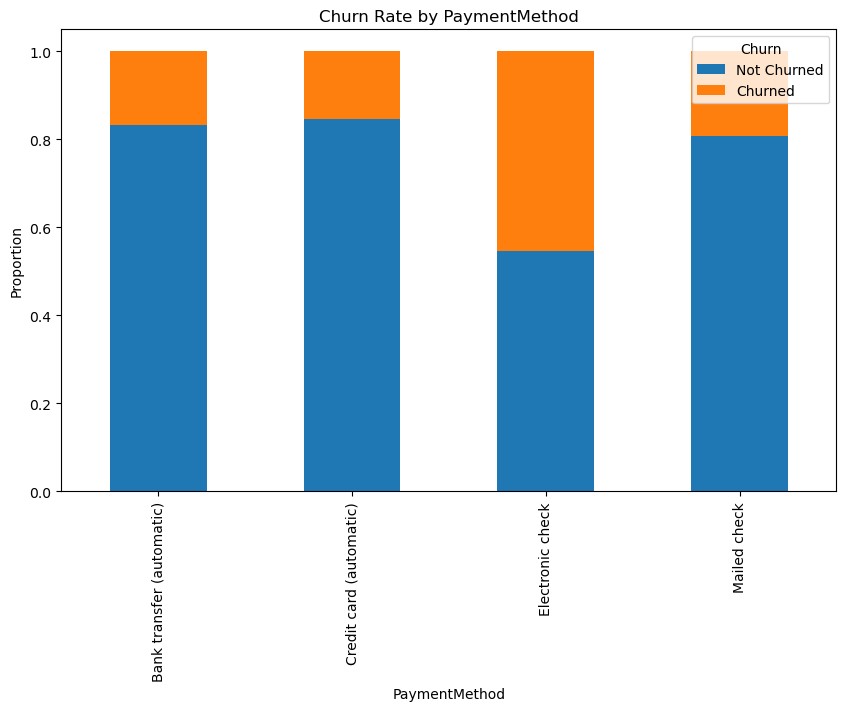

In [8]:
churn_by_paymentmethod = customer_churn.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_paymentmethod)

# Visualization
churn_by_paymentmethod.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rate by PaymentMethod')
plt.ylabel('Proportion')
plt.xlabel('PaymentMethod')
plt.legend(['Not Churned', 'Churned'], title='Churn')
plt.show()

This shows  that customers that use Electronic check are more suspectible to churn than customers using other payment methods.

Churn                 0         1
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813


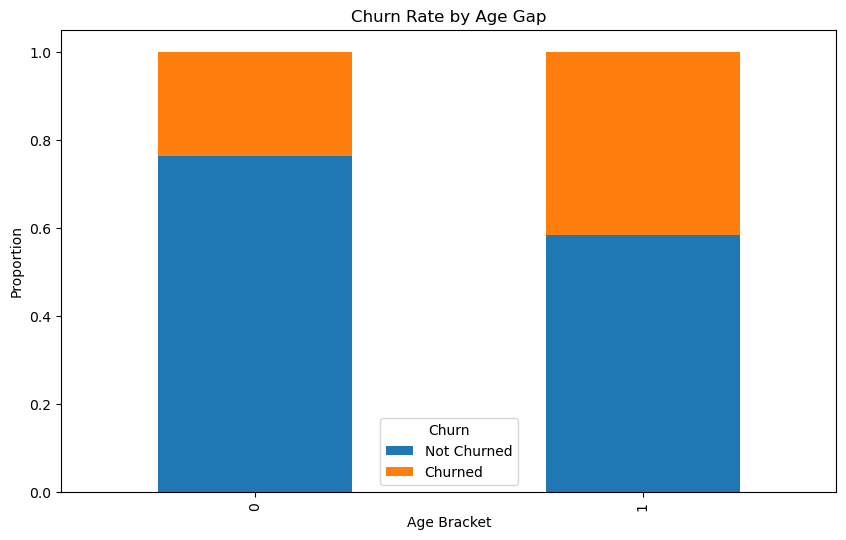

In [28]:
churn_by_agegap = customer_churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_agegap)

# Visualization
churn_by_agegap.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Rate by Age Gap')
plt.ylabel('Proportion')
plt.xlabel('Age Bracket')
plt.legend(['Not Churned', 'Churned'], title='Churn')
plt.show()

In [ ]:
This shows that senior citizens are more likely to churn 

### Data Cleaning & Feature Engineering

In [9]:
#Testing for class imbalance in the churn column

churn_counts = customer_churn['Churn'].value_counts(normalize=True)
print(churn_counts)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


The churn rate shows that there is a class imbalance in the dataset. Before training the model  I'll try to balance the classes 
by creating synthetic samples for the minority class.





In [10]:
#Drop columns that are not needed

customer_churn = customer_churn.drop(['customerID'], axis = 1)

In [11]:
#convert categorical variables to numeric
customer_churn['Churn'] = customer_churn['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

In [12]:
customer_churn = pd.get_dummies(customer_churn, drop_first = True)

### Model Training


In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [17]:
X = customer_churn.drop('Churn', axis= 1)
y = customer_churn['Churn']

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 180)

In [19]:

# Apply SMOTE to training data only
smote = SMOTE(random_state=180)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
model = RandomForestClassifier(n_estimators =100, random_state = 180)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=180)

In [21]:
#Making Predicitions

y_pred = model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7898722195929957
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1534
           1       0.68      0.44      0.53       579

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.77      2113

Confusion Matrix:
 [[1417  117]
 [ 327  252]]


The model has a 79% accuracy which means it is very likely to predict correctly 79% of the time.

Model can be pruned for more accuracy.

### Feature Importance Analysis

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False).head(10)

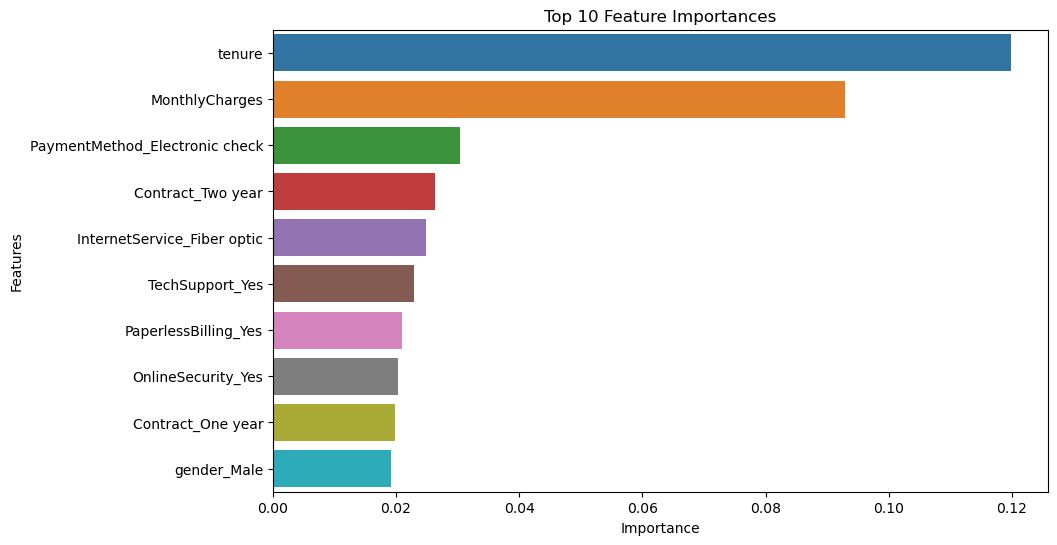

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y= feature_importances.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

This chart shows the important features in the prediction

#### Exporting the Predicted Data for further visualization in PBI

In [26]:


results = X_test.copy()
results['Churn Prediction'] = y_pred
results.to_csv('churn_predictions.csv', index = False)